## Criação de modelos

Em machine learning, começamos avaliando um **problema**. Em seguida, precisamos avaliar dados e fazer previsões.

Para resolver o problema, nós temos **ferramentas**, que são algoritmos regressão, classificação ou cluters.
    
Mas como garantir a melhor ferramenta para cada tipo de problema, como **avaliar um algotimos e parâmetros**?
Para isso, nós temos ferramentas de treinamento, testes, avaliação e validação de modelos.

In [1]:
%%html
                                  
<script>
code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    };
    code_show = !code_show;
} 
$(document).ready(code_display);
</script>
                                      
<form action="javascript: code_display()">
<input style="color: #0f0c0c; background: LightGray; opacity: 0.8;" \ 
type="submit" value="Click to display or hide code cells">
</form>

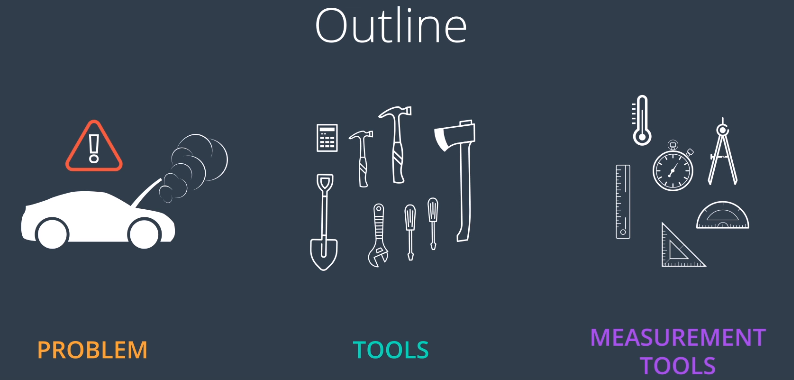

In [4]:
#hide_code
from IPython.display import Image
Image('/home/brunocampos01/Imagens/Seleção_001_27.08.png')

Para avaliar dados precisamos carregar os dados. Para isso utilizamos a biblioteca do Pandas
 - Documentação do Pandas.

## Ferramentas 

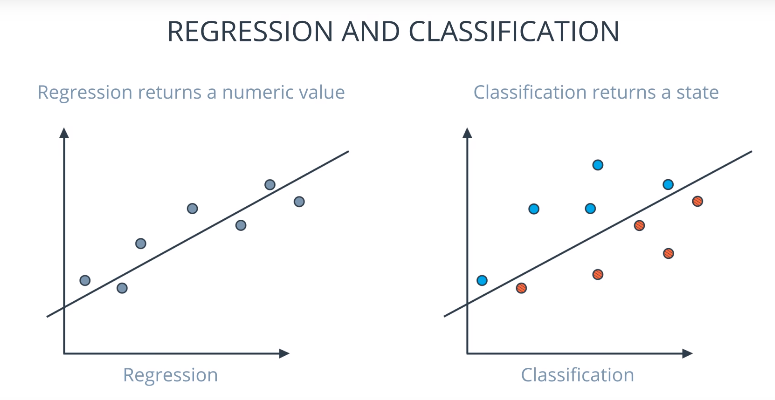

In [5]:
#hide_code
from IPython.display import Image
Image('/home/brunocampos01/projetos/data_science_machine_learning/tutorial/imagens/regressao_classificacao.png')

## Testes


Como escolher o melhor modelo? Esta resposta sempre depende de qual é a pergunta. 

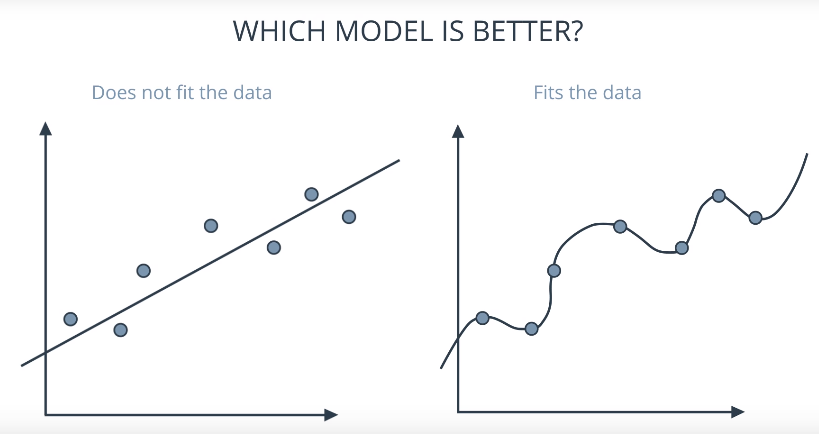

In [5]:
#hide_code
from IPython.display import Image
Image('/home/brunocampos01/projetos/data_science/images/test_model.png')

## O problema do superajuste: 

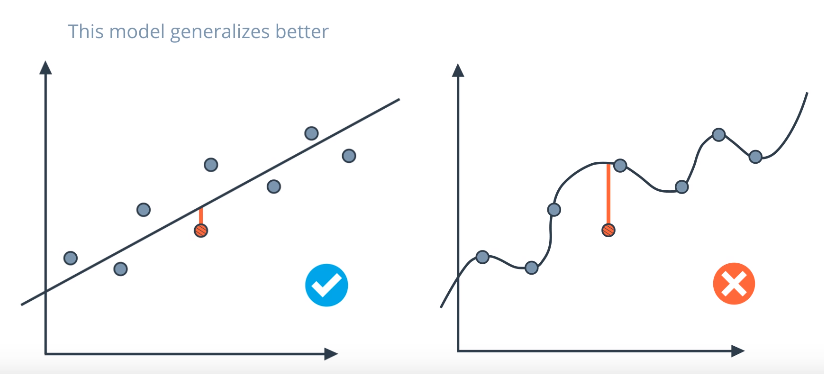

In [3]:
#hide_code
from IPython.display import Image
Image('/home/brunocampos01/projetos/data_science/images/generalize.png')

O grafico da direita sofre um overfitting e apresenta erros maiores.

## Podemos separar problemas de aprendizagem em algumas grandes categorias:

**Aprendizado supervisionado**, em que os dados vem com atributos adicionais que queremos prever. Esse problema pode ser:

#### Classificação : 
 * As amostras com dados já rotulados para prever dados não rotulados.
 * Um exemplo  de problema de classificação seria o exemplo de reconhecimento de dígitos manuscritos, em que o objetivo é atribuir cada vetor de entrada a um de um número finito de categorias distintas.

#### Regressão : 
* Se a saída desejada consiste em uma ou mais variáveis contínuas, a tarefa é chamada de regressão.
* Um exemplo de um problema de regressão seria a previsão do comprimento de um salmão em função de sua idade e peso.

**Aprendizado não supervisionado**, no qual os dados de treinamento consistem em um conjunto de vetores de entrada x sem qualquer valor alvo correspondente. O objetivo em tais problemas pode ser descobrir grupos de exemplos semelhantes dentro dos dados (clusters).

Em geral, um problema de aprendizado considera um conjunto de n amostras de dados e, em seguida, tenta prever propriedades de dados desconhecidos.

Se cada amostra for mais do que um único número, por exemplo, uma entrada multidimensional, diz-se que possui várias dimensões ou atributos.

## Make model of machine learning:

1. imports
2. Load dataset
3. Analyse database
4. Choose the independent and dependent variables
5. Split the data into training/testing sets
6. Create linear regression model
7. Train the model using the training sets
8. Make predictions using the testing sets
9. Make predictions using the values that are not yet in the database.

In [1]:
# SUPERVISED LEARNING

# import
# view
# load
# analyse
"""
Preprocessing data
    # convert variables categorical
    #
    #
    #
"""
# (features)X AND (labels)Y
# split train and test
# choose model: classifier or regressor
# trainning model with data train
# predict
# calculate accuracy (accuracy_score)
# plot

'\nPreprocessing data\n\n'

## Conjunto de treinamento e conjunto de testes

O aprendizado de máquina é sobre aprender algumas propriedades de um conjunto de dados e aplicá-las a novos dados.É por isso que uma prática comum em aprendizado de máquina para avaliar um algoritmo é **dividir os dados em dois conjuntos**:
* **conjunto de treinamento** no qual aprendemos propriedades de dados.
* **conjunto de testes** no qual testamos esses dados.

Aprender os parâmetros de uma função de previsão e testá-la nos mesmos dados é um erro metodológico: um modelo que apenas repetiria os rótulos das amostras que acabaram de ver teriam uma pontuação perfeita, mas não conseguiriam prever nada de útil no entanto. dados invisíveis. Essa situação é chamada de overfitting . Para evitá-lo, é prática comum, ao realizar uma experiência de aprendizado de máquina (supervisionada), reter parte dos dados disponíveis como um conjunto de testes

### Exemplo de import

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Avaliação de modelos

#### Nota: Revisando: accuracy, precision e recall

** Accuracy ** mede com que frequência o classificador faz a predição correta. É a proporção entre o número de predições corretas e o número total de predições (o número de registros testados).

** Precision ** informa qual a proporção de mensagens classificamos como spam eram realmente spam. Ou seja, é a proporção de verdadeiros positivos (mensagens classificadas como spam que eram realmente spam) sobre todos os positivos (todas as palavras classificadas como spam, independente se a classificação estava correta), em outras palavras, é a proporção

`[Verdadeiros positivos/(Verdadeiros positivos + Falso positivos)]`

** Recall(sensibilidade)** nos informa qual a proporção das mensagens que eram spam que foram corretamente classificadas como spam. É a proporção entre os verdadeiros positivos (classificados como spam, que realmente eram spam) sobre todas as palavras que realmente eram spam. Em outras palavras, é a proporção entre

`[Verdadeiros positivos/(Verdadeiros positivos + Falso negativos)]`

Para problemas de classificação distorcidos em suas distribuições, como no nosso caso, por exemplo, se tivéssemos 100 mensagems de texto e apenas 2 fossem spam e todas as outras não fossem, a "accuracy" por si só não seria uma métrica tão boa. Nós poderiamos classificar 90 mensagems como "não-spam" (incluindo as 2 que eram spam mas que teriam sido classificadas como não-spam e, por tanto, seriam falso negativas.) e 10 mensagems como spam (todas as 10 falso positivas) e ainda assim teriamos uma boa pontuação de accuracy. Para estess casos, precision e recall são muito úteis. Estas duas métricas podem ser combinadas para resgatar o F1 score, que é calculado através da média(harmônica) dos valores de precision e de recall. Este score pode variar entre 0 e 1, sendo 1 o melhor resultado possível para o F1 score (consideramos a média harmônica pois estamos lidando com proporções).

http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics